## Problem Statement

Heart Disease is a leading cause of mortality worldwide. Early detection and accurate prediction of heart disease can significantly improve patient outcomes by enabling timely intervention and preventive measures. 

The objective of this project is to develop machine learning model that an effecively predict the presence or absence of heart disease based on various medical and lifestyle factors.


## Research Objective

The goal of this project is to build a predictive model that can accurately classify individuals as either having or not having heart disease. By analysing a comprehensive set of patient attributes, including demographic, clinical and lifestyle factors, the model aims to identify patterns and features indicative of the presence or absence of heart disease.


## 1. Import Libraries and Database


In [1]:
# Importing all the necessary libraries

import os
import pandas as pd
import sqlite3 as db
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC


In [2]:
# Import dataset from csv file into a dataframe

#df = pd.read_csv(r'C:\Users\Koo Zhi Xian\Desktop\cardio_data.csv')

df = pd.read_csv("cardio_data.csv")
# Loading the top 5 records (by default) of the dataframe

df.head()


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


## 2. Understanding Data

In [3]:
# To define the number of rows and columns

df.shape

(70000, 16)

In [4]:
# To provide a summary or statistical distribution of numerical columns

df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [5]:
# Print the overall information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


In [6]:
# Determine the total number of nulls present in the dataset - There are no nulls in this dataset

df.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

In [7]:
# Determine the date range for this dataset, which span from 01/01/2018 to 31/12/2022

df.sort_values(by='date',ascending=False)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
20935,31-12-2022,India,29896,1,21316,0,180,100,2,1,2,158,Chef,0,75.0,1
40900,31-12-2022,Singapore,58450,0,19797,0,120,80,1,2,1,170,Architect,0,78.0,1
54445,31-12-2022,Singapore,77665,1,23194,0,110,70,2,2,1,160,Others,0,70.0,1
247,31-12-2022,Malaysia,341,1,21681,0,120,70,1,1,1,160,Lawyer,0,63.0,0
32536,31-12-2022,Indonesia,46467,1,20229,0,120,80,1,2,1,173,Doctor,0,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41936,01-01-2018,Malaysia,59897,1,15854,0,90,70,1,2,1,163,Chef,0,58.0,0
62151,01-01-2018,Indonesia,88749,0,16007,0,90,60,1,1,1,146,Engineer,0,46.0,0
10990,01-01-2018,Singapore,15729,1,23263,0,130,90,1,1,1,170,Chef,0,69.0,1
33670,01-01-2018,Indonesia,48096,1,16107,0,120,80,1,2,1,176,Teacher,0,98.0,0


Nurse         7905
Accountant    7879
Architect     7869
Others        7813
Lawyer        7753
Chef          7723
Engineer      7707
Teacher       7683
Doctor        7668
Name: occupation, dtype: int64


<Axes: xlabel='occupation', ylabel='count'>

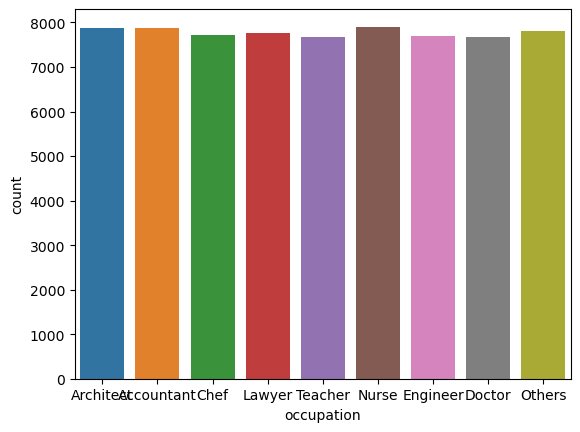

In [8]:
# Determine the types of occupations and their respective counts in the dataset

print(df['occupation'].value_counts())
sns.countplot(x='occupation', data=df)

In [9]:
# To determine the type of occupations in a dataframe and group them by gender 

df.groupby(['occupation', 'gender']).count()

date  country    id  active   age  alco  ap_hi  ap_lo  \
occupation gender                                                          
Accountant 1       5124     5124  5124    5124  5124  5124   5124   5124   
           2       2755     2755  2755    2755  2755  2755   2755   2755   
Architect  1       5083     5083  5083    5083  5083  5083   5083   5083   
           2       2786     2786  2786    2786  2786  2786   2786   2786   
Chef       1       5075     5075  5075    5075  5075  5075   5075   5075   
           2       2648     2648  2648    2648  2648  2648   2648   2648   
Doctor     1       4964     4964  4964    4964  4964  4964   4964   4964   
           2       2704     2704  2704    2704  2704  2704   2704   2704   
Engineer   1       4971     4971  4971    4971  4971  4971   4971   4971   
           2       2736     2736  2736    2736  2736  2736   2736   2736   
Lawyer     1       5004     5004  5004    5004  5004  5004   5004   5004   
           2       2749     2749  2749    2749  2749  2749   2749   2749   
Nurse      1       5204     5204  5204    5204  5204  5204   5204   5204   
           2       2701     2701  2701    2701  2701  2701   2701   2701   
Others     1       5091     5091  5091    5091  5091  5091   5091   5091   
           2       2722     2722  2722    2722  2722  2722   2722   2722   
Teacher    1       5014     5014  5014    5014  5014  5014   5014   5014   
           2       2669     2669  2669    2669  2669  2669   2669   2669   

                   cholesterol  gluc  height  smoke  weight  disease  
occupation gender                                                     
Accountant 1              5124  5124    5124   5124    5124     5124  
           2              2755  2755    2755   2755    2755     2755  
Architect  1              5083  5083    5083   5083    5083     5083  
           2              2786  2786    2786   2786    2786     2786  
Chef       1              5075  5075    5075   5075    5075     5075  
           2              2648  2648    2648   2648    2648     2648  
Doctor     1              4964  4964    4964   4964    4964     4964  
           2              2704  2704    2704   2704    2704     2704  
Engineer   1              4971  4971    4971   4971    4971     4971  
           2              2736  2736    2736   2736    2736     2736  
Lawyer     1              5004  5004    5004   5004    5004     5004  
           2              2749  2749    2749   2749    2749     2749  
Nurse      1              5204  5204    5204   5204    5204     5204  
           2              2701  2701    2701   2701    2701     2701  
Others     1              5091  5091    5091   5091    5091     5091  
           2              2722  2722    2722   2722    2722     2722  
Teacher    1              5014  5014    5014   5014    5014     5014  
           2              2669  2669    2669   2669    2669     2669

In [10]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

# Data Wrangling & Preparation

### Date & Age
#### 1. Change the date to datetime object, and determine the days elapsed from the current date
#### 2. Determine the current age in years by adding age in days to the days elapsed, divided by 365.25

In [11]:
# Determine the days elapsed

# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')   # %Y will be 2023, %y will be 23.

# Get the current date as a datetime object
current_date = datetime.now()

# Calculate the number of days elapsed for each date and stored in 'days_elapsed' column
df['days_elapsed'] = (current_date - df['date']).dt.days

# Display the updated dataframe
print(df['days_elapsed'].head())



0     912
1     818
2     353
3    1827
4    1132
Name: days_elapsed, dtype: int64


In [12]:
# Determine the current age in years and stored in 'current_age' column

df['current_age'] = (df['age'] + df['days_elapsed']) / 365.25

# Display the updated dateframe
print(df['current_age'])

0        52.854209
1        57.620808
2        52.594114
3        53.251198
4        50.940452
           ...    
69995    58.255989
69996    63.679671
69997    53.385352
69998    64.714579
69999    62.028747
Name: current_age, Length: 70000, dtype: float64


In [13]:
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,days_elapsed,current_age
0,2021-05-03,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0,912,52.854209
1,2021-08-05,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1,818,57.620808
2,2022-11-13,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1,353,52.594114
3,2018-10-31,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1,1827,53.251198
4,2020-09-25,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0,1132,50.940452


In [14]:
# Remove column 'id' since we do not need this.

df.drop("id", axis=1, inplace=True)
df.head()

,date,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,days_elapsed,current_age
0,2021-05-03,Indonesia,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0,912,52.854209
1,2021-08-05,Malaysia,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1,818,57.620808
2,2022-11-13,Indonesia,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1,353,52.594114
3,2018-10-31,Singapore,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1,1827,53.251198
4,2020-09-25,Singapore,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0,1132,50.940452


### Systolic and Diastolic Blood Pressure
#### ap_hi - Systolic blood pressure
#### ap_lo - Diastolic blood pressure

#### 1. There are negative values observed in both systolic and diastolic blood pressure, and need to convert to absolute values
#### 2. There are extreme outliers in both systolic and diastolic blood pressure readings which are considered out of range in web search records, and need to be removed

In [15]:
# Convert ap_hi and ap_lo to absolute values.

df['ap_hi'] = df['ap_hi'].abs()
df['ap_lo'] = df['ap_lo'].abs()

print(df['ap_hi'].head())
print(df['ap_lo'].head())

0    110
1    140
2    130
3    150
4    100
Name: ap_hi, dtype: int64
0     80
1     90
2     70
3    100
4     60
Name: ap_lo, dtype: int64


In [16]:
# Based on web search record, we shall consider :
    # systolic blood pressure ranging from 55 - 400 mmHg, and
    # diastolic blood pressure ranging from 20 - 400 mmHg

# drop the ap_hi and ap_lo outliers
df = df[df['ap_hi'] < 400]
df = df[df['ap_hi'] > 55]
df = df[df['ap_lo'] < 400]
df = df[df['ap_lo'] > 20]


In [17]:
df.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease,days_elapsed,current_age
count,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000,68788.000000
mean,0.803367,19464.442286,0.053629,126.614686,81.377275,1.364715,1.348753,1.225970,164.361487,0.087995,74.122209,0.494897,1217.440309,56.623909
std,0.397455,2468.230980,0.225285,16.763713,9.688121,0.678962,0.476579,0.571943,8.184763,0.283290,14.331371,0.499978,527.183653,6.920409
min,0.000000,10798.000000,0.000000,60.000000,30.000000,1.000000,1.000000,1.000000,55.000000,0.000000,11.000000,0.000000,304.000000,31.364819
25%,1.000000,17657.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000,761.000000,51.712526
50%,1.000000,19701.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000,1219.000000,57.245722
75%,1.000000,21324.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000,1672.000000,62.039699
max,1.000000,23713.000000,1.000000,240.000000,190.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000,2130.000000,70.496920


### Height and Weight 

#### Drop extreme outliers for height and weight measurements

In [18]:
# drop the weight outliers
df = df[df['weight'] > 30]

# drop the height outliers
df = df[df['height'] > 130]

In [19]:
df.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease,days_elapsed,current_age
count,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000
mean,0.803425,19464.630029,0.053625,126.618424,81.379785,1.364934,1.348728,1.226074,164.445596,0.088016,74.117294,0.494926,1217.367118,56.624222
std,0.397411,2467.948473,0.225277,16.764360,9.687875,0.679118,0.476571,0.572048,7.842796,0.283320,14.286809,0.499978,527.207074,6.919856
min,0.000000,10798.000000,0.000000,60.000000,30.000000,1.000000,1.000000,1.000000,131.000000,0.000000,31.000000,0.000000,304.000000,31.364819
25%,1.000000,17658.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000,761.000000,51.712526
50%,1.000000,19701.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000,1219.000000,57.245722
75%,1.000000,21324.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000,1672.000000,62.039699
max,1.000000,23713.000000,1.000000,240.000000,190.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000,2130.000000,70.496920


## Encoding Occupation and Country

In [20]:
# map country into Nominal Values
df['country'] = df['country'].map({'Singapore': 1, 'Malaysia': 2, 'Indonesia': 3, 'India': 4})

In [21]:
print(df['occupation'].unique())

# map Occupation into Nominal Values
df['occupation'] = df['occupation'].map({'Architect': 1, 'Accountant': 2, 'Chef': 3, 'Lawyer': 4, 'Teacher': 5, 'Nurse': 6, 'Engineer': 7, 'Doctor': 8, 'Others': 0})

['Architect' 'Accountant' 'Chef' 'Lawyer' 'Teacher' 'Nurse' 'Engineer'
 'Doctor' 'Others']


In [22]:
df.head()

,date,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,days_elapsed,current_age
0,2021-05-03,3,1,18393,0,110,80,1,2,1,168,1,0,62.0,0,912,52.854209
1,2021-08-05,2,1,20228,0,140,90,3,1,1,156,2,0,85.0,1,818,57.620808
2,2022-11-13,3,0,18857,0,130,70,3,1,1,165,3,0,64.0,1,353,52.594114
3,2018-10-31,1,1,17623,0,150,100,1,2,1,169,4,0,82.0,1,1827,53.251198
4,2020-09-25,1,0,17474,0,100,60,1,1,1,156,1,0,56.0,0,1132,50.940452


In [23]:
df.corr()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,days_elapsed,current_age
country,1.000000,0.005003,0.002063,-0.001777,0.002084,0.000609,0.003755,-0.004372,0.000095,-0.005461,0.000326,0.000836,-0.000186,0.002959,0.002004,0.002432
active,0.005003,1.000000,-0.010606,0.025044,-0.001345,0.000111,0.009170,0.005780,-0.007415,-0.009413,-0.001932,0.025255,-0.017633,-0.037299,-0.000902,-0.010545
age,0.002063,-0.010606,1.000000,-0.028934,0.208796,0.152636,0.155562,-0.023157,0.099336,-0.086376,0.003045,-0.048013,0.055409,0.239636,0.007465,0.978004
alco,-0.001777,0.025044,-0.028934,1.000000,0.032375,0.043260,0.035780,0.171239,0.011001,0.098595,0.000657,0.339872,0.068136,-0.007990,-0.009087,-0.030148
ap_hi,0.002084,-0.001345,0.208796,0.032375,1.000000,0.696858,0.193950,0.061373,0.092511,0.017843,0.002081,0.026991,0.268687,0.425279,-0.000639,0.203745
ap_lo,0.000609,0.000111,0.152636,0.043260,0.696858,1.000000,0.158682,0.066551,0.076339,0.035202,0.002414,0.024615,0.248251,0.334753,0.000155,0.149073
cholesterol,0.003755,0.009170,0.155562,0.035780,0.193950,0.158682,1.000000,-0.036599,0.451277,-0.055351,0.002344,0.009987,0.141415,0.221578,0.001445,0.152199
gender,-0.004372,0.005780,-0.023157,0.171239,0.061373,0.066551,-0.036599,1.000000,-0.021187,0.522063,0.000358,0.338815,0.157032,0.007274,-0.002154,-0.023061
gluc,0.000095,-0.007415,0.099336,0.011001,0.092511,0.076339,0.451277,-0.021187,1.000000,-0.021136,0.002715,-0.005626,0.106865,0.089969,0.006468,0.098346
height,-0.005461,-0.009413,-0.086376,0.098595,0.017843,0.035202,-0.055351,0.522063,-0.021136,1.000000,0.004635,0.196165,0.311341,-0.012134,0.000630,-0.084210


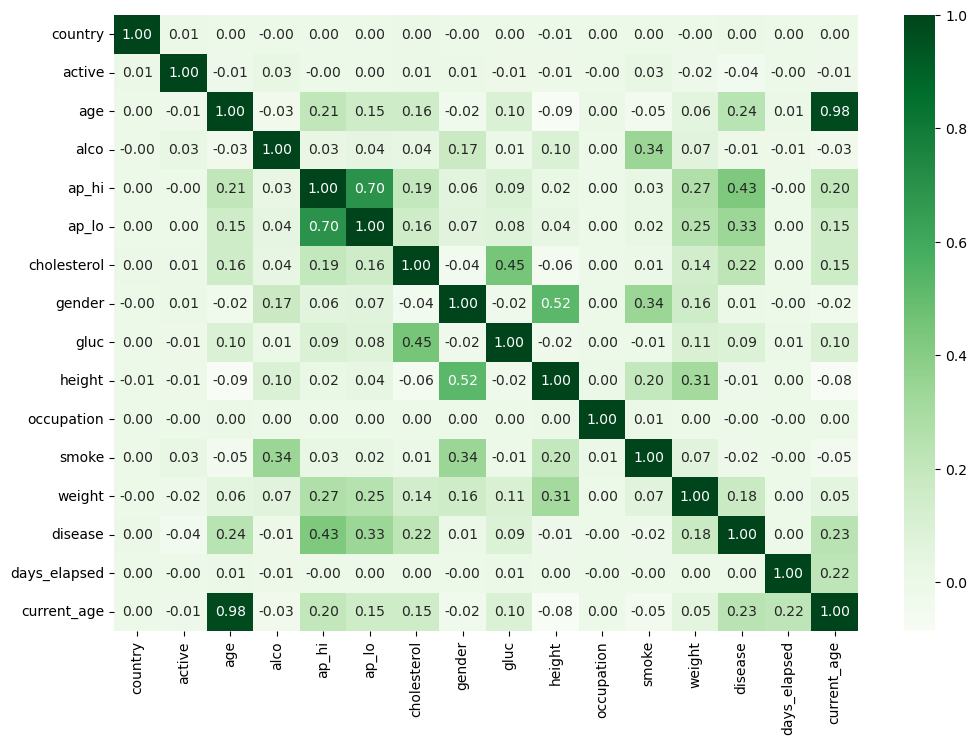

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Greens', fmt='.2f', annot=True)
plt.show()

 Heart disease shows positive correlation with ap_hi, ap_lo, cholesterol, weight and current_age.

In [25]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates()

country      country        1.000000
current_age  age            0.978004
ap_hi        ap_lo          0.696858
height       gender         0.522063
cholesterol  gluc           0.451277
                              ...   
smoke        current_age   -0.047651
             age           -0.048013
cholesterol  height        -0.055351
current_age  height        -0.084210
age          height        -0.086376
Length: 121, dtype: float64

In [26]:
# Drop the unnecessary columns
df.drop(['date', 'days_elapsed', 'age'], axis=1, inplace=True)

In [27]:
# Feature Selection

X = df.drop('disease', axis=1)
y = df['disease']

In [28]:
# Verifying the features and target variables

display(X.head())
display(y.head())

,country,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,current_age
0,3,1,0,110,80,1,2,1,168,1,0,62.0,52.854209
1,2,1,0,140,90,3,1,1,156,2,0,85.0,57.620808
2,3,0,0,130,70,3,1,1,165,3,0,64.0,52.594114
3,1,1,0,150,100,1,2,1,169,4,0,82.0,53.251198
4,1,0,0,100,60,1,1,1,156,1,0,56.0,50.940452


0    0
1    1
2    1
3    1
4    0
Name: disease, dtype: int64

In [29]:
# Train-Test-Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [30]:
print(X_train[0:5])
print(y_train[0:5])
print(X_test[0:5])
print(y_test[0:5])

       country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
16198        3       1     0    150    100            1       2     3     170   
61462        3       1     0    120     80            1       1     1     159   
22037        2       1     0    120     80            1       1     1     169   
41158        2       0     0    140     79            3       2     1     169   
56809        3       1     0    120     80            1       1     1     164   

       occupation  smoke  weight  current_age  
16198           4      0   100.0    62.581793  
61462           7      0    72.0    50.053388  
22037           4      0    69.0    59.312799  
41158           8      0    91.0    57.585216  
56809           1      0    59.0    45.103354  
16198    1
61462    0
22037    0
41158    1
56809    0
Name: disease, dtype: int64
       country  active  alco  ap_hi  ap_lo  cholesterol  gender  gluc  height  \
25640        3       1     0    130     80            2      

In [31]:
print(X_train.shape)

(54944, 13)


In [32]:
print(X_test.shape)

(13737, 13)


In [33]:
print(y_train.value_counts())
(y_train.value_counts()/54944)*100

0    27770
1    27174
Name: disease, dtype: int64


0    50.54237
1    49.45763
Name: disease, dtype: float64

In [34]:
print(y_test.value_counts())
(y_test.value_counts()/13737)*100

0    6919
1    6818
Name: disease, dtype: int64


0    50.36762
1    49.63238
Name: disease, dtype: float64

The sample proportion of presence and absence of heard disease is balanced in the training and testing data.

### Data Modelling

We will compare the accuracy from the following models to decide which one performs best and the best performng model will be selected to determine the presence or absence of heart disease.
* Logistic Regression
* Random Forest Classifier
* k-Neighbors Classifier
* Decision Tree Classifier
* Support Vector Classifier

#### (i) Logistic Regression

In [35]:
# Instantiating and training the model on training dataset and making prediction using Logistic Regression

log = LogisticRegression()
log.fit(X_train, y_train)
y_predicted = log.predict(X_test)
logAccuracy = metrics.accuracy_score(y_predicted, y_test)
print("The accuracy of logistic regression model is: {:.1f}%".format(logAccuracy*100))

The accuracy of logistic regression model is: 70.8%


In [36]:
# Instantiating and training the model on training dataset and making prediction using Logistic Regression with 500 iterations

log2 = LogisticRegression(max_iter=500)
log2.fit(X_train, y_train)
y_predicted = log2.predict(X_test)
logAccuracy2 = metrics.accuracy_score(y_predicted, y_test)
print("The accuracy of logistic regression model is: {:.1f}%".format(logAccuracy2*100))

The accuracy of logistic regression model is: 72.5%


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6919
           1       0.77      0.63      0.69      6818

    accuracy                           0.72     13737
   macro avg       0.73      0.72      0.72     13737
weighted avg       0.73      0.72      0.72     13737



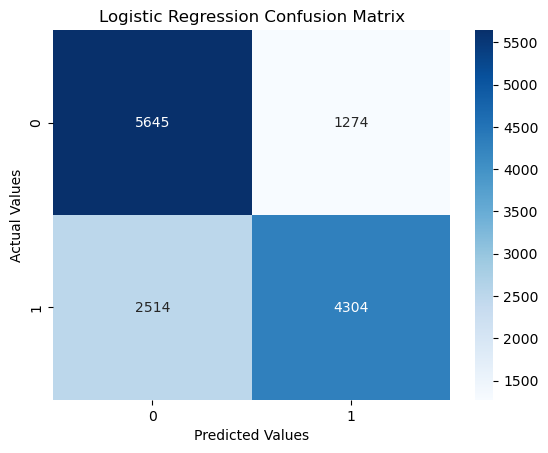

In [52]:
# Performance metric for logistic regression and visualize on a heatmap

logConf = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(logConf, cmap='Blues', annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
print(classification_report(y_test,y_predicted))


#### (ii) Random Forest Classifier

In [38]:
# Instantiating and training the model on training dataset and making prediction using Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)
rfAccuracy = metrics.accuracy_score(y_predicted, y_test)
print("The accuracy of Random Forest model is: {:.1f}%".format(rfAccuracy*100))

The accuracy of Random Forest model is: 72.1%


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6919
           1       0.77      0.63      0.69      6818

    accuracy                           0.72     13737
   macro avg       0.73      0.72      0.72     13737
weighted avg       0.73      0.72      0.72     13737



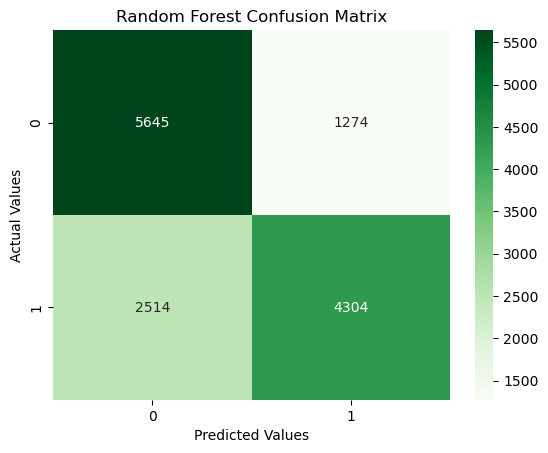

In [51]:
# Performance metric for Random Forest Classifier and visualize on a heatmap

rfConf = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(rfConf, annot=True, cmap='Greens',fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
print(classification_report(y_test, y_predicted))

#### (iii) k-Nearest Neighbor (k-NN) Classifier

In [40]:
# Instantiating and training the model on training dataset and making prediction using k-Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
knnAccuracy = metrics.accuracy_score(y_predicted, y_test)
print("The accuracy of KNN model is: {:.1f}%".format(knnAccuracy*100))

The accuracy of KNN model is: 68.8%


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6919
           1       0.77      0.63      0.69      6818

    accuracy                           0.72     13737
   macro avg       0.73      0.72      0.72     13737
weighted avg       0.73      0.72      0.72     13737



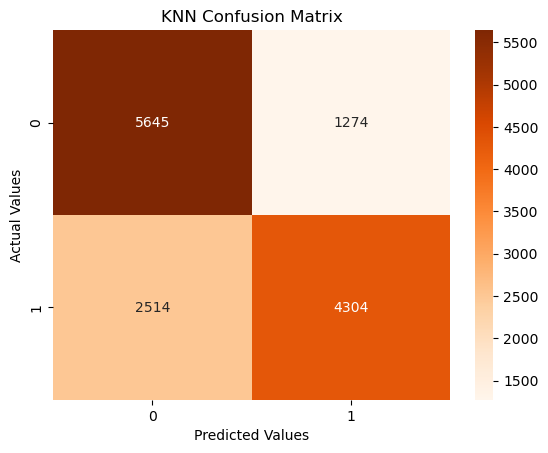

In [50]:
# Performance metric for k-Nearest Neighbor and visualize on a heatmap

knnConf = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(knnConf, annot=True, cmap='Oranges',fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
print(classification_report(y_test, y_predicted))

#### (iv) Decision Tree Classifier

In [42]:
# Instantiating and training the model on training dataset and making prediction using Decision Tree Classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_predicted = tree.predict(X_test)
treeAccuracy = metrics.accuracy_score(y_predicted, y_test)
print("The accuracy of Decision Tree model is: {:.1f}%".format(treeAccuracy*100))

The accuracy of Decision Tree model is: 63.2%


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6919
           1       0.77      0.63      0.69      6818

    accuracy                           0.72     13737
   macro avg       0.73      0.72      0.72     13737
weighted avg       0.73      0.72      0.72     13737



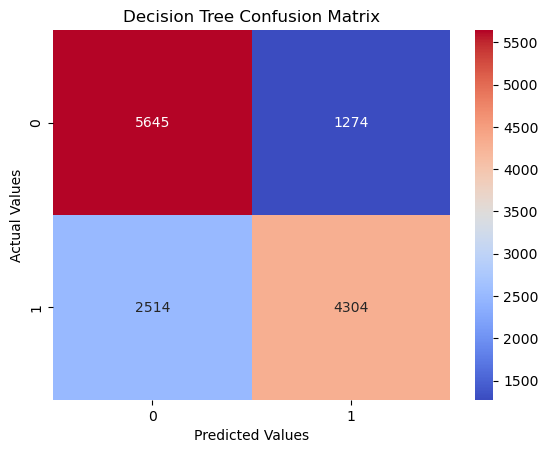

In [49]:
# Performance metric for Decision Tree Classifier and visualize on a heatmap

treeConf = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(treeConf, annot=True, cmap='coolwarm',fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
print(classification_report(y_test, y_predicted))

#### (v) Support Vector Machine (SVM)

In [44]:
# Instantiating and training the model on training dataset and making prediction using Support Vector Machine 

svc = SVC()
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)
svcAccuracy = metrics.accuracy_score(y_predicted, y_test)
print("The accuracy of Support Vector machine model is: {:.1f}%".format(svcAccuracy*100))

The accuracy of Support Vector machine model is: 72.4%


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6919
           1       0.77      0.63      0.69      6818

    accuracy                           0.72     13737
   macro avg       0.73      0.72      0.72     13737
weighted avg       0.73      0.72      0.72     13737



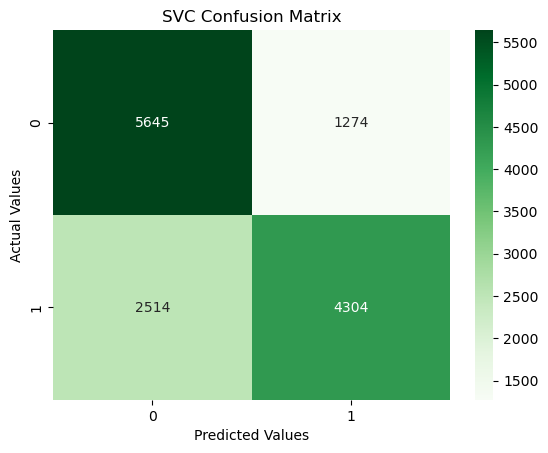

In [53]:
# Performance metric for Support Vector Machine and visualize on a heatmap

svcConf = metrics.confusion_matrix(y_test, y_predicted)
sns.heatmap(svcConf, annot=True, cmap='Greens',fmt='d')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
print(classification_report(y_test, y_predicted))

### Model Performance Evaluation

In [47]:
print("The accuracy of logistic regression model is: {:.1f}%".format(logAccuracy*100))
print("The accuracy of Random Forest model is: {:.1f}%".format(rfAccuracy*100))
print("The accuracy of KNN model is: {:.1f}%".format(knnAccuracy*100))
print("The accuracy of Decision Tree model is: {:.1f}%".format(treeAccuracy*100))
print("The accuracy of Support Vector machine model is: {:.1f}%".format(svcAccuracy*100))

The accuracy of logistic regression model is: 70.8%
The accuracy of Random Forest model is: 72.1%
The accuracy of KNN model is: 68.8%
The accuracy of Decision Tree model is: 63.2%
The accuracy of Support Vector machine model is: 72.4%


Based on the accuracy score of the five machine learning models, both the Random Forest model and Support Vector Machine model achieve the highest level of accuracy.

In [59]:
rf.predict([[1,0,0,150,100,1,2,1,169,4,0,82,53]])

array([1], dtype=int64)

* Random Forest Model predict the presence of heart disease based on the identified pivotal factors.

In [69]:
svc.predict([[3,0,1,150,100,3,2,1,165,7,1,79,40]])

array([1], dtype=int64)

In [70]:
tree.predict([[3,0,1,150,100,3,2,1,165,7,1,79,40]])

array([0], dtype=int64)

* SVC Model predict the presence of heart disease based on the identified pivotal factors.
* However, Decision Tree model did not detect the presence of heart disease given the same selected inputs due to it's poor accuracy score.

### Conclusion

With the developed ML model, early detection of heart disease is achievable, leading to enhanced patient outcomes through timely intervention and preventive strategies.